# Custom CNN: 5 convolutional layers
1. Read and Overview Data
3. Data Preparation
4. Create CNN Model
5. Train and Test the Model
6. Plotting Results
7. Conclusion

# 1. Read and Overview Data 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
print(os.listdir("data/training"))

['111', '137', '155', '160', '228', '284', '33', '368', '42', '461', '48', '50', '505', '516', '52']


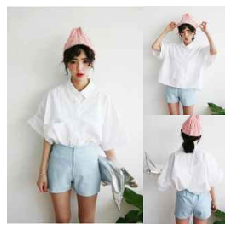

In [4]:
# plotting a random image from category 505
img = plt.imread("data/training/505/365.jpg")
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.axis("off")
plt.show()

### Load train, test and validation data

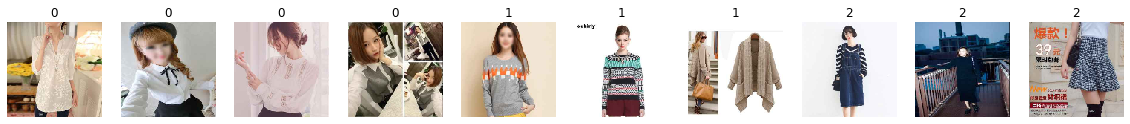

In [14]:
# plotting one of all clothing types in data
plt.figure(figsize = (20,20))
for i in range(10):
    img = x_[950*i]
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

# 2. Data Preparation

In [19]:
IMG_SIZE = 128 # set image size to 128*128
x_train = np.load('data/train_images.npy')
y_train = np.load('data/train_labels.npy')
x_val = np.load('data/val_images.npy')
y_val = np.load('data/val_labels.npy')
x_test = np.load('data/test_images.npy')
y_test = np.load('data/test_labels.npy')

In [20]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 15)
y_val = to_categorical(y_val,num_classes = 15)
y_test = to_categorical(y_test,num_classes = 15)
print(y_train.shape)

(60646, 15)


# 3. Create CNN Model 

### Create Sequential model

In [21]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Add output layer
model.add(Dense(15,activation="softmax"))
model.summary() # print summary of the model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 128)      

### Compile model

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

### Set epoch and batch size values

In [23]:
epoch = 30 
batch_size = 64

### Create a data augmentation and apply to `x_train` data 

In [24]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

# 4. Train and Test the Model

## Train the model

In [25]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/30
947/947 [==============================] - 2031s 2s/step - loss: 2.4990 - accuracy: 0.2366 - val_loss: 2.2433 - val_accuracy: 0.3020
Epoch 2/30
947/947 [==============================] - 2022s 2s/step - loss: 2.0081 - accuracy: 0.3443 - val_loss: 1.8087 - val_accuracy: 0.4080
Epoch 3/30
947/947 [==============================] - 2020s 2s/step - loss: 1.8243 - accuracy: 0.4002 - val_loss: 1.8099 - val_accuracy: 0.4144
Epoch 4/30
947/947 [==============================] - 2022s 2s/step - loss: 1.7205 - accuracy: 0.4291 - val_loss: 1.5826 - val_accuracy: 0.4629
Epoch 5/30
947/947 [==============================] - 2021s 2s/step - loss: 1.6310 - accuracy: 0.4552 - val_loss: 1.6241 - val_accuracy: 0.4580
Epoch 6/30
947/947 [==============================] - 2022s 2s/step - loss: 1.5706 - accuracy: 0.4748 - val_loss: 1.5239 - val_accuracy: 0.4884
Epoch 7/30
947/947 [==============================] - 2022s 2s/step - loss: 1.5202 - accuracy: 0.4901 - val_loss: 1.4002 - val_accuracy:

In [26]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) 
#get score acording to test datas

16847/16847 [==============================] - 223s 13ms/step
Test Accuracy: 60.59%


## Result:
- train accuracy: 61.66%
- validation accuracy: 61.43%
- test accuracy: 60.59%

# 5. Plotting Results

In [27]:
x_ = np.array(range(len(history.history['loss']))) # get loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'], # get loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['accuracy'],# get accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

In [28]:
x_ = np.array(range(len(history.history['val_loss'])))# get validation loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['val_loss'], # get validation loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,0,0.9)"),
        text = "Validation Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['val_accuracy'],# get validation accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(255,0,0,0.9)"),
        text = "Validation Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Validation Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

## Plot confusion matrix of test data

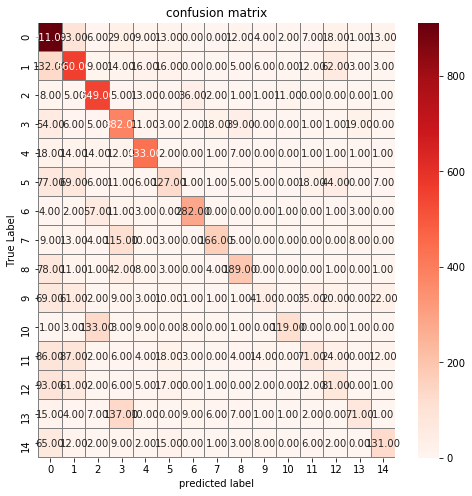

In [29]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# 7. Conclusion
* Accuracy rate exceeded 61% limit while in the training phase. In the same way validation accuracy return the 61%, test accuracy is 60%.
* According to the confusion matrix, the most difficult to detect the type is 9. 
* According to the confusion matrix, the easiest to detect the type is 0.